<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 NVDIA Analysis
  </h1>
</div>

In [32]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [33]:
import warnings
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [34]:
warnings.filterwarnings("ignore")

In [35]:
# variable
TICKER= 'NVDA'

In [36]:
#paths
RAW_DATA_PATH='../../data/raw/yfinance_data/'+TICKER+'_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/'+TICKER+'_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [37]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/NVDA_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (6421, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


### Dataset Overview

In [38]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
610,2001-06-22,0.380208,0.390375,0.375417,0.380417,0.348929,761184000,0.0,0.0
1553,2005-03-29,0.206833,0.209167,0.201583,0.202500,0.185738,587400000,0.0,0.0
5799,2022-02-07,24.372000,25.181999,24.202000,24.728001,24.690756,376868000,0.0,0.0
1012,2003-02-03,0.087583,0.089333,0.085833,0.087667,0.080411,755556000,0.0,0.0
3741,2013-12-04,0.392500,0.399750,0.391500,0.399000,0.376382,493176000,0.0,0.0
3367,2012-06-08,0.298250,0.304000,0.297750,0.303000,0.277920,370308000,0.0,0.0
930,2002-10-04,0.071250,0.073500,0.066667,0.067833,0.062218,529788000,0.0,0.0
6351,2024-04-19,83.150002,84.323997,75.606003,76.199997,76.193741,875198000,0.0,0.0
2540,2009-02-27,0.201250,0.211750,0.199750,0.207000,0.189866,755444000,0.0,0.0
4097,2015-05-06,0.553750,0.559000,0.545250,0.552500,0.532551,316484000,0.0,0.0


In [39]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
6416,2024-07-24,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0
6417,2024-07-25,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0
6418,2024-07-26,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0
6419,2024-07-29,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0
6420,2024-07-30,111.519997,111.989998,102.540001,103.730003,103.730003,486833300,0.0,0.0


In [40]:
#shape of the dataset
df.shape

(6421, 9)

In [41]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [42]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6421.0,6.207884e+00,1.613833e+01,3.489600e-02,2.775000e-01,4.572500e-01,4.182500e+00,1.398000e+02
High,6421.0,6.320466e+00,1.642486e+01,3.554700e-02,2.862500e-01,4.647500e-01,4.235750e+00,1.407600e+02
Low,6421.0,6.085095e+00,1.579491e+01,3.333300e-02,2.695000e-01,4.507500e-01,4.116500e+00,1.324200e+02
Close,6421.0,6.207702e+00,1.611852e+01,3.411500e-02,2.767500e-01,4.570000e-01,4.175000e+00,1.355800e+02
Adj Close,6421.0,6.181334e+00,1.612135e+01,3.129119e-02,2.538425e-01,4.276375e-01,4.130434e+00,1.355800e+02
Volume,6421.0,6.060791e+08,4.323482e+08,1.968000e+07,3.456350e+08,5.070000e+08,7.362000e+08,9.230856e+09
Dividends,6421.0,2.548668e-05,3.155628e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
Stock Splits,6421.0,3.348388e-03,1.423972e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01


In [43]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,6421,6421,1999-01-22,1


In [44]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6421 non-null   object 
 1   Open          6421 non-null   float64
 2   High          6421 non-null   float64
 3   Low           6421 non-null   float64
 4   Close         6421 non-null   float64
 5   Adj Close     6421 non-null   float64
 6   Volume        6421 non-null   int64  
 7   Dividends     6421 non-null   float64
 8   Stock Splits  6421 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 451.6+ KB


In [45]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            6421
Volume          6337
Adj Close       5380
Close           4980
Open            4867
High            4840
Low             4829
Dividends          9
Stock Splits       5
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [46]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [47]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [48]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [49]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [50]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [51]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [52]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [53]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 6421/6421 (0 became NaT)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6421 non-null   datetime64[ns, UTC]
 1   Open          6421 non-null   float64            
 2   High          6421 non-null   float64            
 3   Low           6421 non-null   float64            
 4   Close         6421 non-null   float64            
 5   Adj Close     6421 non-null   float64            
 6   Volume        6421 non-null   int64              
 7   Dividends     6421 non-null   float64            
 8   Stock Splits  6421 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 451.6 KB


In [55]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [56]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
3050,2011-03-08 00:00:00+00:00,0.517250,0.520000,0.478000,0.488750,0.448295,1947184000,0.0,0.0
4993,2018-11-23 00:00:00+00:00,3.582750,3.739750,3.569750,3.625000,3.592784,411968000,0.0,0.0
4375,2016-06-13 00:00:00+00:00,1.156250,1.192500,1.156250,1.169750,1.148953,475588000,0.0,0.0
1187,2003-10-13 00:00:00+00:00,0.141000,0.143750,0.139917,0.140833,0.129176,434904000,0.0,0.0
610,2001-06-22 00:00:00+00:00,0.380208,0.390375,0.375417,0.380417,0.348929,761184000,0.0,0.0
3513,2013-01-09 00:00:00+00:00,0.314750,0.316250,0.303250,0.305250,0.281790,695020000,0.0,0.0
4023,2015-01-20 00:00:00+00:00,0.502500,0.505250,0.494250,0.500500,0.480578,140308000,0.0,0.0
4906,2018-07-23 00:00:00+00:00,6.245500,6.247250,6.082000,6.235250,6.176458,301584000,0.0,0.0
115,1999-07-08 00:00:00+00:00,0.040104,0.041406,0.038802,0.040755,0.037382,186048000,0.0,0.0
3803,2014-03-06 00:00:00+00:00,0.466750,0.469250,0.458750,0.459500,0.435410,290144000,0.0,0.0


In [57]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [58]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00+00:00,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00+00:00,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00+00:00,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00+00:00,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00+00:00,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6416,2024-07-24 00:00:00+00:00,119.169998,119.949997,113.440002,114.250000,114.250000,327776900,0.0,0.0
6417,2024-07-25 00:00:00+00:00,113.040001,116.629997,106.300003,112.279999,112.279999,460067000,0.0,0.0
6418,2024-07-26 00:00:00+00:00,116.190002,116.199997,111.580002,113.059998,113.059998,293399100,0.0,0.0
6419,2024-07-29 00:00:00+00:00,113.690002,116.279999,111.300003,111.589996,111.589996,248152100,0.0,0.0


In [59]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [60]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      Open      High       Low     Close  \
0 1999-01-22 00:00:00+00:00  0.043750  0.048828  0.038802  0.041016   
1 1999-01-25 00:00:00+00:00  0.044271  0.045833  0.041016  0.045313   
2 1999-01-26 00:00:00+00:00  0.045833  0.046745  0.041146  0.041797   
3 1999-01-27 00:00:00+00:00  0.041927  0.042969  0.039583  0.041667   
4 1999-01-28 00:00:00+00:00  0.041667  0.041927  0.041276  0.041536   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.037621  2714688000        0.0           0.0  
1   0.041562   510480000        0.0           0.0  
2   0.038337   343200000        0.0           0.0  
3   0.038218   244368000        0.0           0.0  
4   0.038098   227520000        0.0           0.0  


In [61]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi      Volume  trend_macd
0 1999-01-22 00:00:00+00:00  0.041016           NaN  2714688000         NaN
1 1999-01-25 00:00:00+00:00  0.045313           NaN   510480000         NaN
2 1999-01-26 00:00:00+00:00  0.041797           NaN   343200000         NaN
3 1999-01-27 00:00:00+00:00  0.041667           NaN   244368000         NaN
4 1999-01-28 00:00:00+00:00  0.041536           NaN   227520000         NaN


{'Cumulative Return': 2288.188572871752, 'Annualized Volatility': 0.6010903147343262, 'Sharpe Ratio': 0.7769330464170732, 'Max Drawdown': -0.897224320424378, 'Calmar Ratio': 2550.2970893493634}


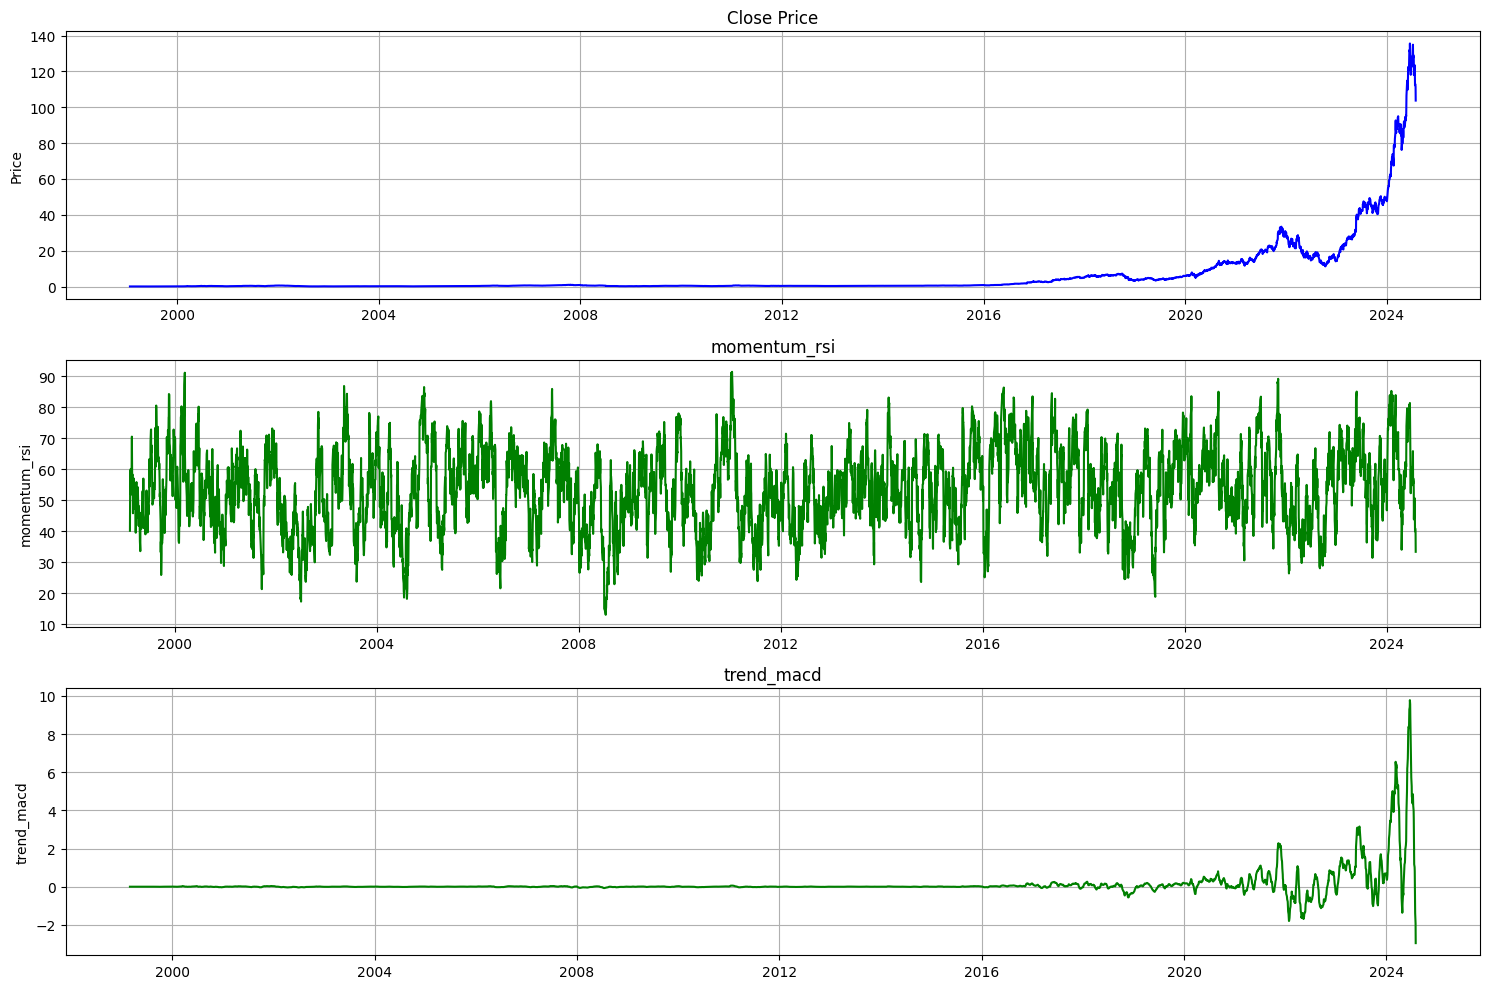

In [62]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()